## Matplotlib Assignment


### Scipy -- Curve fitting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from scipy import optimize

In [5]:
## Defining the temperatures

Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

## Covering the data of the year

months = np.arange(1,13)

Text(0, 0.5, 'Temperature (`C)')

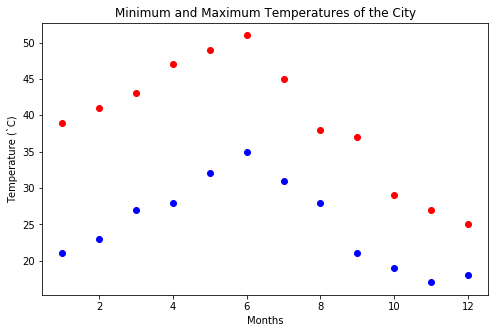

In [21]:
## plotting the temperature points

fig = plt.figure(figsize=(8,5))

plt.plot(months,Max,'ro')
plt.plot(months,Min,'bo')

plt.title("Minimum and Maximum Temperatures of the City")
plt.xlabel("Months")
plt.ylabel("Temperature (`C)")

In [ ]:
## Sine Curve Representation and its explanation
# y = A sin(B(x + C)) + D
# y = (amp * sin((x + ph_shift) * (2 * np.pi /x.max())) + ver_shift

# A--> Amplitude
# B--> period = 2pi/B
# c--> phase shift, horizontal displacement from the standard sine curve, from the y-axis(time_offset)
# D--> vertical shift, vertical displacement from the x-axis

In [15]:
## Defining the function to produce a Sine Curve

def sine_fit(x_data,amp,ph_shift,ver_shift):
    return (amp * np.sin(((2 * np.pi)/x_data.max())*(x_data + ph_shift))) + ver_shift

In [16]:
## Optimizing the sine_fit curve parameters

param_max,cov_max = optimize.curve_fit(sine_fit,months,Max)
param_min,cov_max = optimize.curve_fit(sine_fit,months,Min)

In [17]:
param_max

array([-11.01878019, -20.02888904,  39.25      ])

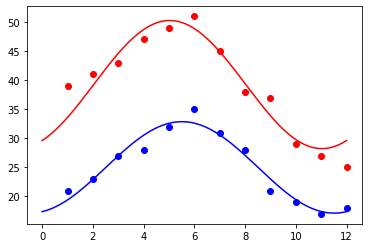

In [19]:
## plotting the curve along with the temperatures

days = np.linspace(0,12,365)
plt.figure()

plt.plot(months,Max,'ro')
plt.plot(days,sine_fit(days,*param_max),'r-')

plt.plot(months,Min,'bo')
plt.plot(days,sine_fit(days,*param_min),'b-')

plt.title("Minimum and Maximum Temperatures of the City")
plt.xlabel("Months")
plt.ylabel("Temperature (`C)")

### Matplotlib --- Titanic Data Set

In [66]:
## Titanic Dataset from Seaborn Library

titan = sns.load_dataset("titanic")
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
titan.groupby('sex')['sex'].count()

sex
female    314
male      577
Name: sex, dtype: int64

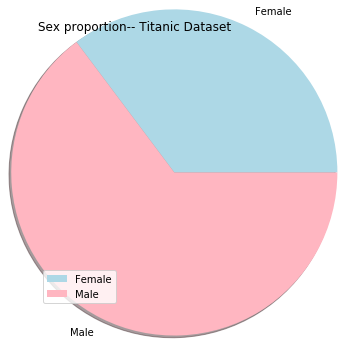

In [35]:
## Plotting the pie chart

plt.figure(figsize=(8,5))

plt.pie(titan.groupby('sex')['sex'].count(),colors=['lightblue','lightpink'],
        labels=['Female','Male'],shadow=True, radius=1.5)

plt.title("Sex proportion-- Titanic Dataset", loc='left')
plt.legend(loc='best')

In [43]:
titan.sex.unique()

array(['male', 'female'], dtype=object)

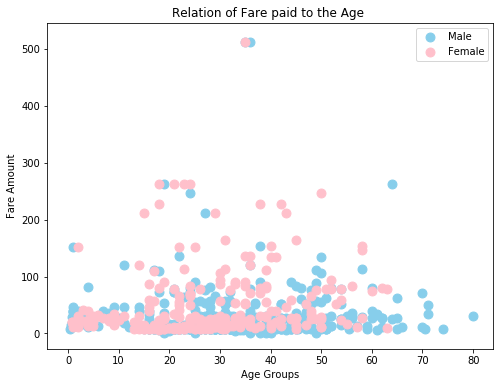

In [65]:
## Plotting the scatter plot

plt.figure(figsize=(8,6))
for sex,color in zip(titan.sex.unique(), ['skyblue','pink']):
    sub_df = titan[titan.sex == sex]
    plt.scatter(sub_df.age, sub_df.fare, c=color, s=80, label=sex.title())

plt.title("Relation of Fare paid to the Age ")
plt.xlabel("Age Groups")
plt.ylabel("Fare Amount")
plt.legend()